# Names: Austin He, Maya Lee, Kevin Barcenas, Luis Gamino


In [154]:
# Standard Headers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import DataFrame
import numpy as np
import seaborn as sns
import plotly.express as px
import math as pi
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Pokebase is a Pokemon API that has extensive information about each pokemon
# https://pokeapi.co/docs/v2
#import pokebase as pb

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.2'

# **Introduction**

### **Machine Learning Problem**
- What is the machine learning problem you are trying to solve?
- Why does this problem matter?
- What could the results of your predictive model be used for?
- Why is it important to predict the outcome you are focusing on?

### **Problem Statement**

The primary objective of this project is to classify Pokémon based on their attributes such as attack, defense, speed, and other statistics. Predicting Pokémon types has applications in game strategy optimization, character balancing, and understanding gameplay dynamics. By leveraging machine learning, we aim to build a model that accurately predicts a Pokémon's type, aiding players and game developers in decision-making.


### **Project Goal**
In this project, we aim to predict the type of a Pokémon based on its attributes such as attack, defense, speed, and other statistics. The dataset contains various details about Pokémon, including their type, stats, and additional features.

Understanding Pokémon types can provide insights into game strategy, character balancing, and player preferences.

---

### **Dataset Description**
The dataset used for this project is **`pokedex.csv`**, which contains data on various Pokemon. Below is a description of the dataset's features:

- **`images`**: Path to an image of the Pokemon, located in the 'images' folder.
- **`index`**: The unique number of each Pokemon in the Pokedex.
- **`Name`**: The name of the Pokemon.
- **`Type 1`**: The primary type of the Pokemon.
- **`Type 2`**: The secondary type of the Pokemon (nullable if the Pokemon has only one type).
- **`Total`**: The sum of all the Pokemon's stats.
- **`HP`**: Hit points or health; determines how much damage a Pokemon can withstand.
- **`Attack`**: The base value for normal attacks.
- **`Defense`**: The base resistance against normal attacks.
- **`SP. Atk`**: The base value for special attacks.
- **`SP. Def`**: The base resistance against special attacks.
- **`Speed`**: Determines which Pokemon attacks first during each round.

---


# Pokemon

In [155]:
# data = pd.read_csv(r"C:\Users\kevin barcenas\Documents\GitHub\Pokemon_ML\pokedex.csv", skipinitialspace=True)
data = pd.read_csv(r"pokedex.csv", skipinitialspace=True)
display(data.head())

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


# Part 1: Data cleaning, Data Exploration, Feature Engineering, etc.

# Data Exploration

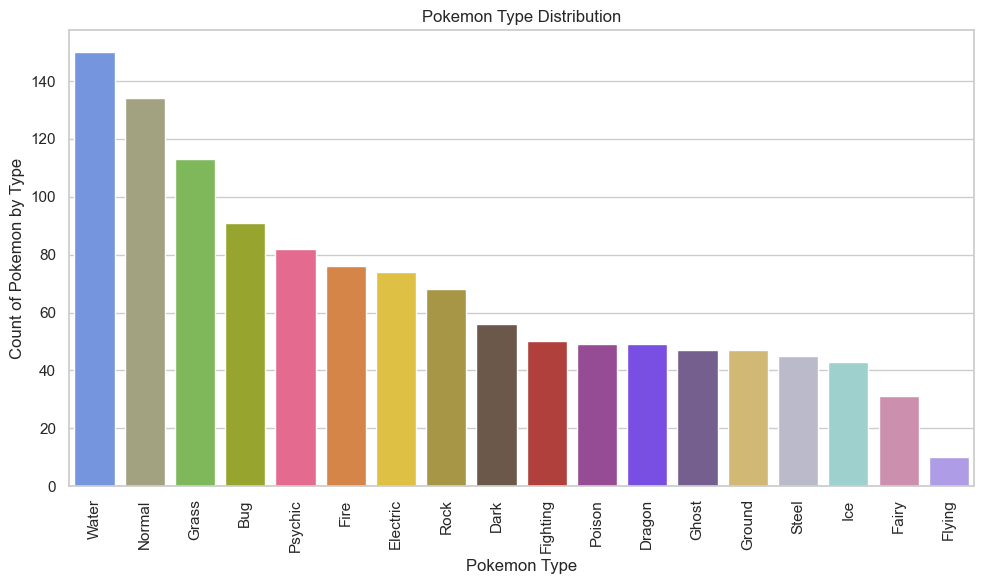

In [156]:
type_1 = ["Dragon", "Steel", "Flying", "Psychic", "Rock", "Fire", "Electric", "Dark", "Ghost", "Ground", "Ice", "Water", "Grass", "Fighting", "Fairy", "Poison", "Normal", "Bug"]
color = ["#6F35FC", "#B7B7CE", "#A98FF3", "#F95587", "#B6A136", "#EE8130", "#F7D02C", "#705746", "#735797", "#E2BF65", "#96D9D6", "#6390F0", "#7AC74C", "#C22E28", "#D685AD", "#A33EA1", "#A8A77A", "#A6B91A"]

col = pd.DataFrame({"Type 1": type_1, "color": color})

# count the total occurrences of each Type 1
type_counts = data['Type 1'].value_counts().reset_index()
type_counts.columns = ['Type 1', 'tot']
# merge
merged_data = pd.merge(type_counts, col, on='Type 1', how='left')
# plot the distribution of Pokémon types
plt.figure(figsize=(10, 6))

# Create a color mapping for each Type 1
color_mapping = dict(zip(merged_data['Type 1'], merged_data['color']))

# Create a bar plot for type distribution, using 'hue' to map 'Type 1' to colors
sns.barplot(x='Type 1', y='tot', data=merged_data, hue='Type 1', palette=color_mapping)

# Customize the plot
plt.xticks(rotation=90) 
plt.title("Pokemon Type Distribution")
plt.xlabel('Pokemon Type')
plt.ylabel('Count of Pokemon by Type')
sns.set_theme(style="whitegrid")

plt.tight_layout()
plt.show()

As seen above, there's a significantly larger amount of Water-type Pokémon when only considering the primary typing of a Pokémon. However, when dual types are taken into account, this dominance might shift, depending on the frequency of secondary types.

This is an important observation as it suggests a potential class imbalance in the dataset. Such imbalances could impact the performance of models trained on this data, especially if type-related features play a significant role in predictions. Proper preprocessing or class weighting may be required to address this issue effectively.

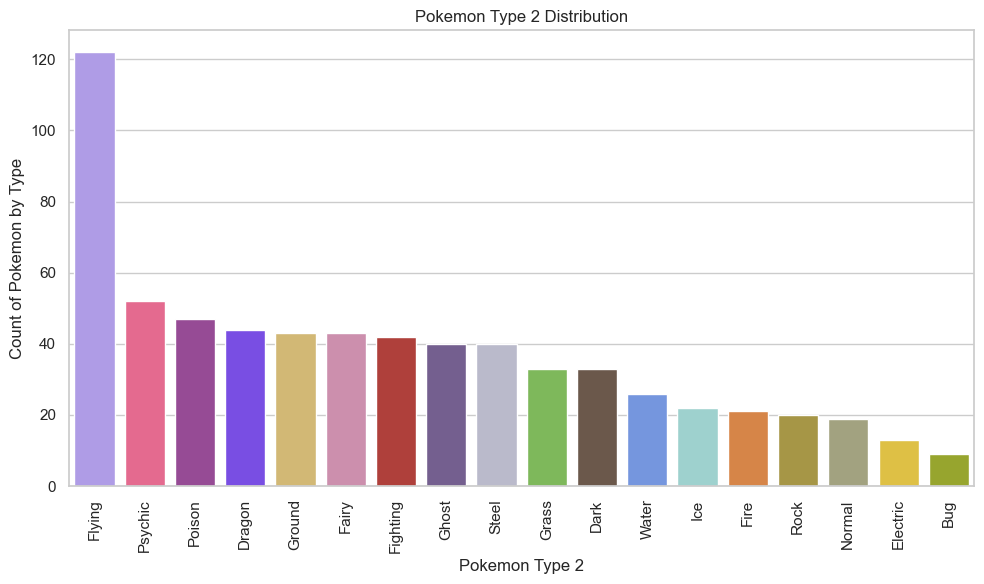

In [157]:
# Pokemon Type 2 distribution
col_2 = pd.DataFrame({"Type 2": type_1, "color": color})
type_2_counts = data['Type 2'].value_counts().reset_index()
type_2_counts.columns = ['Type 2', 'tot']
merged_data_2 = pd.merge(type_2_counts, col_2, on='Type 2', how='left')
color_mapping_2 = dict(zip(merged_data_2['Type 2'], merged_data_2['color']))


plt.figure(figsize=(10, 6))

sns.barplot(
    x='Type 2', 
    y='tot', 
    data=merged_data_2, 
    hue='Type 2', 
    palette=color_mapping_2
)

# Customize the plot
plt.xticks(rotation=90) 
plt.title("Pokemon Type 2 Distribution")
plt.xlabel('Pokemon Type 2')
plt.ylabel('Count of Pokemon by Type')
sns.set_theme(style="whitegrid")

plt.tight_layout()
plt.show()

**Secondary Pokémon Type Distribution:**

Flying-Type Prevalence: Flying is the most common secondary type by a large margin. This aligns with the fact that many Pokémon, such as birds and dragons, have Flying as their secondary type.
Balanced Distribution: Types like Psychic, Poison, Dragon, and Ground are moderately distributed as secondary types, showing a balance among secondary typings.
Rare Secondary Types: Bug, Electric, and Normal appear less frequently as secondary types, indicating these typings are uncommon as complements to primary types.

**General Observations:**

Class Imbalance: The clear dominance of certain types like Water (primary) and Flying (secondary) indicates a class imbalance in the dataset. This may require adjustment when training models to avoid bias.
Diversity in Typing: The distribution of primary and secondary types highlights the diversity of Pokémon typings, but some rare types like Ice, Fairy, and Flying (as primary) and Bug or Electric (as secondary) are underrepresented.
Flying as a Secondary Type: The exceptionally high frequency of Flying as a secondary type could be due to many Pokémon in the "bird" archetype being dual Flying types.

*What we've proposed is applying a sort of weight to the primary and secondary (if any) types of pokemons.*

Option 1: Equal Weight for Dual Types (0.5/0.5)
>Treats both typings equally, which is straightforward and ensures every Pokémon contributes to both categories. May dilute the effect of the primary type, which often has a stronger influence on stats.

Option 2: More Weight for Primary Type (e.g., 0.7 Primary / 0.3 Secondary)
>Reflects that primary type is usually the main determinant of stat tendencies. This could improve prediction accuracy by aligning better with design patterns. Might undervalue the influence of the secondary type, especially for Pokémon whose secondary type significantly impacts their stats (e.g., Dragon/Flying Pokémon).

Option 3: Context-Specific Weighting: Dynamic Weighting Approach

This approach assigns weights dynamically based on stat contributions of primary and secondary types:

1. **Analyze Single-Type Pokémon Stats**:  
   - Compute average stats for Pokémon with a single type to establish a baseline.

2. **Compare Dual-Type Stats**:  
   - Identify differences in stats (e.g., Speed, Attack) between single-type Pokémon and those with specific dual typings.

3. **Adjust Weights**:  
   - Significant impact → Use a balanced split (e.g., 0.5/0.5).  
   - Minimal impact → Favor the primary type (e.g., 0.7/0.3).

**Example: Fire Type with Electric Secondary**
- **Step 1**: Calculate average stats for all Fire-type Pokémon (e.g., high Special Attack).  
- **Step 2**: Compare with Fire/Electric Pokémon. If Electric boosts Speed, assign higher weight to the secondary type.  
- **Step 3**: Adjust: Significant Speed → 0.5/0.5 split; Minimal Speed → 0.7/0.3 split favoring Fire.

**Benefits**
- **Stat-Based Precision**: Weights reflect real stat contributions.  
- **Flexibility**: Adapts to specific archetypes (e.g., Dragon/Flying vs. Water/Fairy).  
- **Diversity Preservation**: Ensures no type is overlooked while prioritizing primary types.



In [158]:
feature_columns = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']
def get_weights():
    # Compute average stats of single and udal types
    single_type_df= data[data['Type 2'].isnull()]# only 1 typed pokemon
    dual_type_df= data[data['Type 2'].notnull()]# only 2 typed pokemon

    single_type_avg_stats = single_type_df.groupby('Type 1')[feature_columns].mean()
    dual_type_avg_stats = dual_type_df.groupby(['Type 1', 'Type 2'])[feature_columns].mean()

    # Print the average stats
    print("Single-Type Average Stats:")
    print(single_type_avg_stats)

    print("\nDual-Type Average Stats:")
    print(dual_type_avg_stats)

    type_1_array = data['Type 1'].unique().tolist()
    type_2_array = data['Type 2'].dropna().unique().tolist()

    weight_dict = {}
    #initialize weight dictionary
    for type1 in type_1_array:
        weight_dict[type1] = (1, 0) # single type, so it has all weight
        for type2 in type_2_array:
            if type1 != type2:
                typesStr = type1+" "+type2
                weight_dict[typesStr] = (0.5, 0.5) # equal for now

    # compare single vs dual and assign a weight
    stat_thresholds = {
        'HP': 50,
        'Attack': 20,
        'Defense': 20,
        'SP. Atk.': 20,
        'SP. Def': 20,
        'Speed': 20
    }
    for type1 in type_1_array:
        single_type = single_type_avg_stats.loc[type1]
        for type2 in type_2_array:
            types = (type1, type2)
            if types in dual_type_avg_stats.index:
                dual_type = dual_type_avg_stats.loc[types]
                typesStr = type1+" "+type2
                if typesStr in weight_dict:
                    diff = dual_type - single_type
                    insignificant = True
                    for stat in feature_columns:
                        if abs(diff[stat]) >= stat_thresholds[stat]:
                            insignificant = False
                            break
                    if insignificant:
                        weight_dict[types] = (0.7, 0.3) # secondary deemed insignificant
    return weight_dict
weight_dict = get_weights()
print(weight_dict)

Single-Type Average Stats:
                 HP     Attack     Defense   SP. Atk.    SP. Def      Speed
Type 1                                                                     
Bug       48.920000  48.480000   54.960000  37.560000  46.040000  44.320000
Dark      60.000000  79.187500   58.937500  73.250000  61.687500  81.750000
Dragon    71.153846  89.923077   65.615385  61.769231  67.923077  61.076923
Electric  62.351351  71.108108   56.648649  80.621622  64.621622  85.135135
Fairy     69.857143  64.904762   68.666667  73.190476  83.904762  57.238095
Fighting  70.200000  99.333333   69.366667  47.233333  64.466667  62.933333
Fire      62.675676  76.729730   58.027027  72.135135  62.270270  71.891892
Flying    66.000000  82.250000   60.000000  77.750000  65.000000  91.500000
Ghost     53.947368  69.052632   76.578947  80.368421  86.263158  54.315789
Grass     62.808511  70.404255   68.808511  67.468085  64.787234  61.510638
Ground    66.764706  91.058824   85.058824  48.294118  57.882

The code creates radar charts for each Pokémon type (grouped by Type 1) to visualize the average characteristics (e.g., HP, Attack, Defense, etc.) of Pokémon having that primary type. It organizes these radar charts into a grid layout, enabling easy comparison between types. Displays the average values of key features.

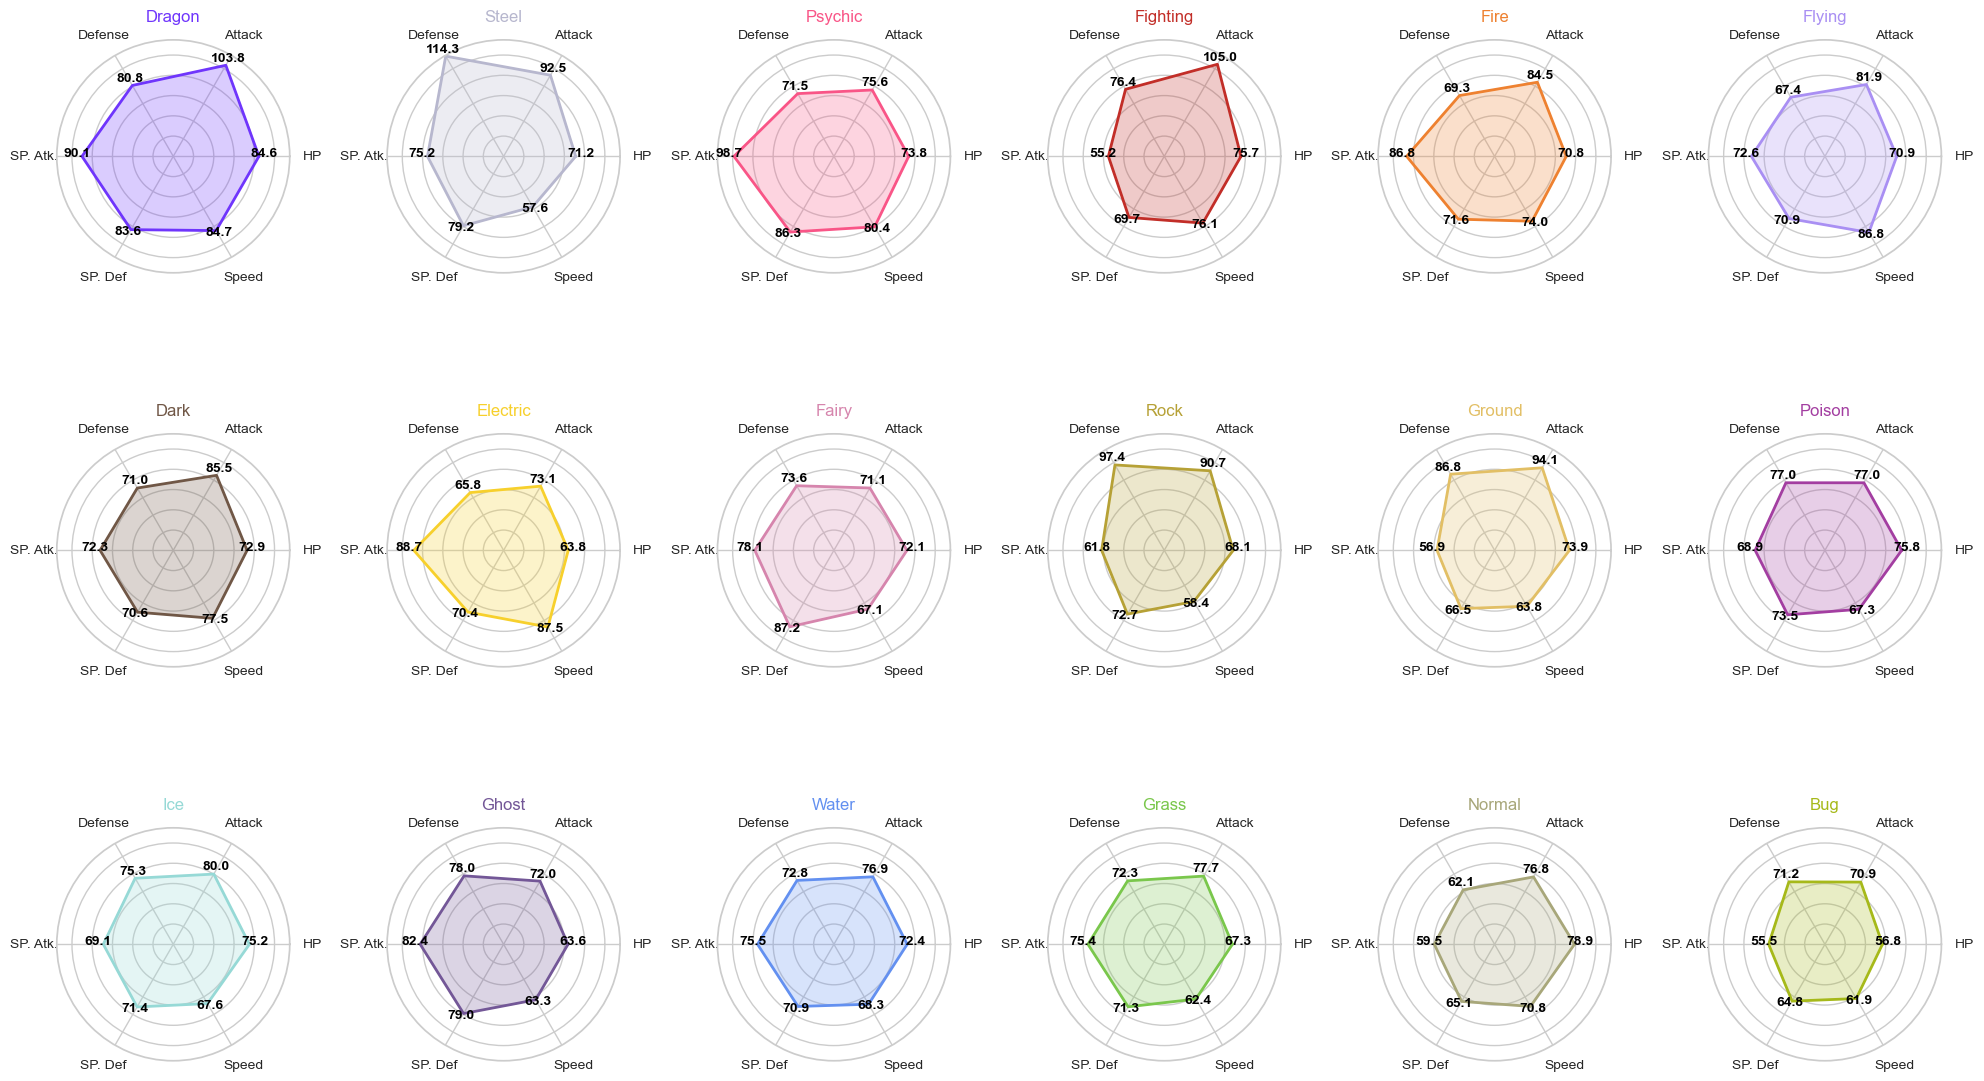

In [159]:
# calculate mean of each feature grouped by Type 1
feature_columns = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']
res = data[feature_columns + ['Type 1']].groupby('Type 1').mean()

# add a sum of all features for sorting
res['sumChars'] = res.sum(axis=1)
# sort by the sum of characteristics
res = res.sort_values(by='sumChars', ascending=False)
# merge color information based on 'Type 1'
res = pd.merge(res, col, on='Type 1', how='left')

# Nnormalize the max and min values for the radar chart
max_values = np.ceil(res[feature_columns].max(axis=0)).values
min_values = np.zeros(len(feature_columns))

# function to create radar charts
def radar_chart(data, color, features, max_values, min_values, ax):
    categories = features
    N = len(categories)
    
    # compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = data[categories].values.tolist()
    
    # complete the values to form a closed polygon
    values += values[:1]
    angles += angles[:1]
    
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(min_values.min(), max_values.max())
    
    
    for i, value in enumerate(values[:-1]):
        ax.text(angles[i], value + 5, f"{value:.1f}", horizontalalignment='center', size=10, color='black', weight='bold')
    
# create radar charts for each Pokémon type
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.5)

for i, (index, row) in enumerate(res.iterrows()):
    row_data = row[feature_columns]
    color = row['color']
    
    # Calculate grid position
    ax = axes[i // 6, i % 6]  # Use integer division and modulus to place charts in grid
    
    # Generate radar chart
    radar_chart(row, color, feature_columns, max_values, min_values, ax)
    
    # Set the title of each subplot to the Type 1 name using row.name
    title = row['Type 1']
    ax.set_title(title, size=12, color=color)  # `index` is the Pokémon type (row name)

if len(res) < 18:
    for j in range(len(res), 18):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


### Data Cleaning
Here, we clean the dataset by:
- Merging "Type 1" and "Type 2" columns to create a combined "Types" column.
- Removing unnecessary columns, such as "Image" and "Index".
- Adding height and weight information from an external source (processed locally).


In [160]:
data.fillna({"Type 2":""}, inplace=True)
types = data['Type 1'] + " " + data['Type 2']
#inserting merged columns into the data set
data.insert(5, "Types", types)
display(data.head())


,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65


### Adding Height and Weight Data to the Pokémon Dataset

Height (in meters) and weight (in kilograms) are additional features obtained from the **PokeAPI**. 

- Since querying the API for all Pokémon is time-intensive, the data extraction was completed locally, and the results were saved as a CSV file (`height_weight.csv`).
- Below is the process used for data extraction (commented-out script for reference).
- The final step reads the locally saved `height_weight.csv` file and extracts only the `Height` and `Weight` columns to merge with the main dataset.


Adding weight and height in the data. This information is coming from the PokeAPI 
Due to time consuming script to obtain the height and weight of the pokemons the data extraction was done locally and will be added as a csv file. 
The script will be below

```python
data['Height'] = np.nan
data['Weight'] = np.nan

for index, row in df.iterrows():
    pokemon_name = row['Name'].lower()
    try:
        current_pokemon = pb.pokemon(pokemon_name)
        df.at[index, 'Height'] = current_pokemon.height
        df.at[index, 'Weight'] = current_pokemon.weight
    except Exception as e:
        df.at[index, 'Height'] = np.nan
        df.at[index, 'Weight'] = np.nan
df.to_csv("pokemon_csv_with_heightweight.csv", index=False)
        

In [161]:

# Read the pre-saved height and weight data
# height_weight_data = pd.read_csv(r"C:\Users\kevin barcenas\Documents\GitHub\Pokemon_ML\height_weight.csv",encoding="latin1")
height_weight_data = pd.read_csv(r"height_weight.csv",encoding="latin1")

# Extract only the height and weight columns
ht_wt = height_weight_data.iloc[:, -2:]

data['Height'] = ht_wt['Height'].dropna()
data['Weight'] = ht_wt['Weight'].dropna()

data['Height'] = data['Height'].astype(float)
data['Weight'] = data['Weight'].astype(float)
# Display the updated data
display(data)

            

,Image,Index,Name,Type 1,Type 2,Types,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,images/1.png,1,Bulbasaur,Grass,Poison,Grass Poison,318,45,49,49,65,65,45,0.7,6.9
1,images/2.png,2,Ivysaur,Grass,Poison,Grass Poison,405,60,62,63,80,80,60,1.0,13.0
2,images/3.png,3,Venusaur,Grass,Poison,Grass Poison,525,80,82,83,100,100,80,2.0,100.0
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,Grass Poison,625,80,100,123,122,120,80,2.4,155.5
4,images/5.png,4,Charmander,Fire,,Fire,309,39,52,43,60,50,65,0.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,Steel Psychic,590,90,72,100,122,108,98,1.6,156.0
1211,images/1212.png,1024,Terapagos Normal Form,Normal,,Normal,450,90,65,85,65,85,60,0.2,6.5
1212,images/1213.png,1024,Terapagos Terastal Form,Normal,,Normal,600,95,95,110,105,110,85,0.3,16.0
1213,images/1214.png,1024,Terapagos Stellar Form,Normal,,Normal,700,160,105,110,130,110,85,1.7,77.0


In [162]:
# Data Cleaning: Remove Image column and Index column

data.dropna(inplace=True) # dropping pokemons without height and weight
first_type_label = data['Type 1']
data.drop("Image", axis=1, inplace=True) # Drop image column, not necessary for models
data.drop("Index", axis=1, inplace=True) # Drop the Index column, inputting ordered information could mess up the model
data.drop("Type 1", axis=1, inplace=True)
data.drop("Type 2", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Total", axis=1, inplace =True) # Uncomment for later since its a total of all the other columns

#Separating Labels and Features
class_labels = data['Types']
features = data.copy(deep=True)
features.drop('Types', axis=1, inplace=True) #
display(features.head())
display(class_labels)

,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Height,Weight
0,45,49,49,65,65,45,0.7,6.9
1,60,62,63,80,80,60,1.0,13.0
2,80,82,83,100,100,80,2.0,100.0
3,80,100,123,122,120,80,2.4,155.5
4,39,52,43,60,50,65,0.6,8.5


0        Grass Poison
1        Grass Poison
2        Grass Poison
3        Grass Poison
4               Fire 
            ...      
1210    Steel Psychic
1211          Normal 
1212          Normal 
1213          Normal 
1214     Poison Ghost
Name: Types, Length: 1214, dtype: object

## Feature Exploring 
In this section, we explore the relations between features, and look for any trends or outliers

Here, we plot the frequenciesies of the different types of pokemon, both single and dual typed. Since there are so many different combination of types, we displayed the top 15 most frequent types. From the plot, we can see that there are many more normal and water types than others.

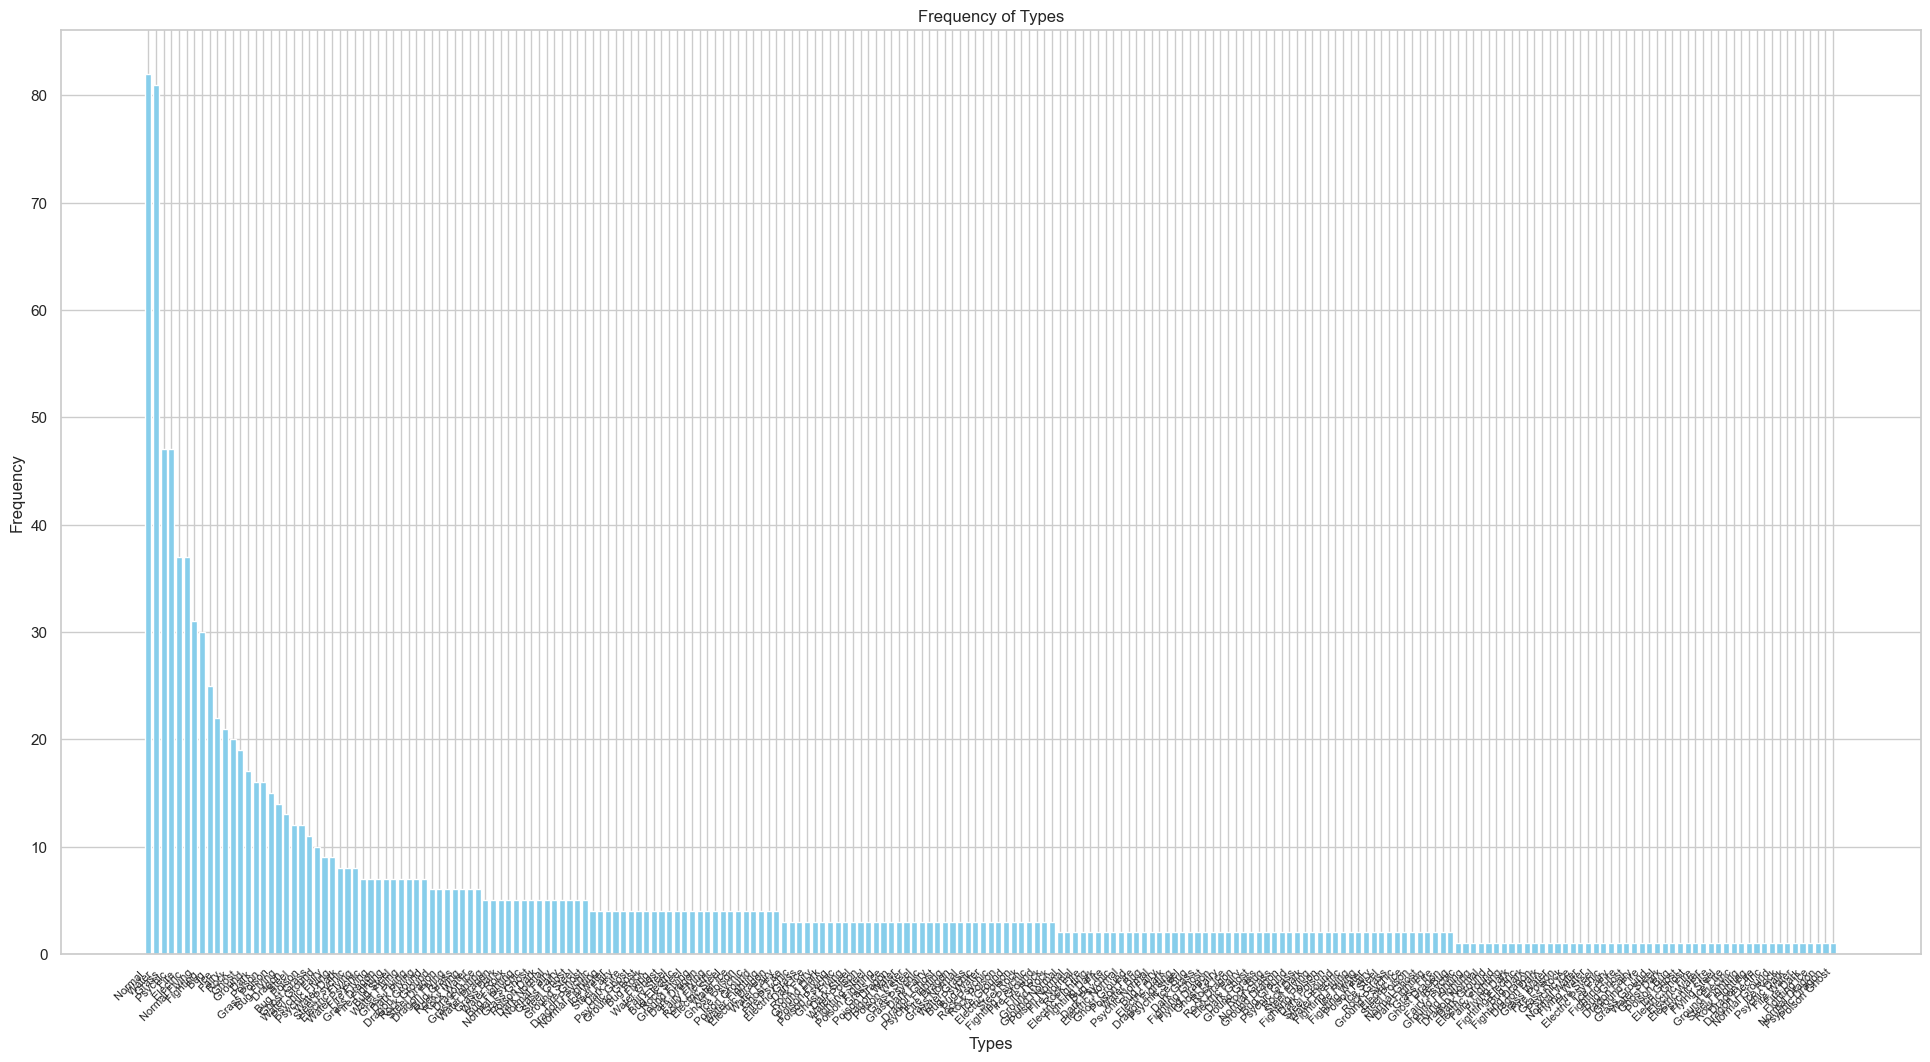

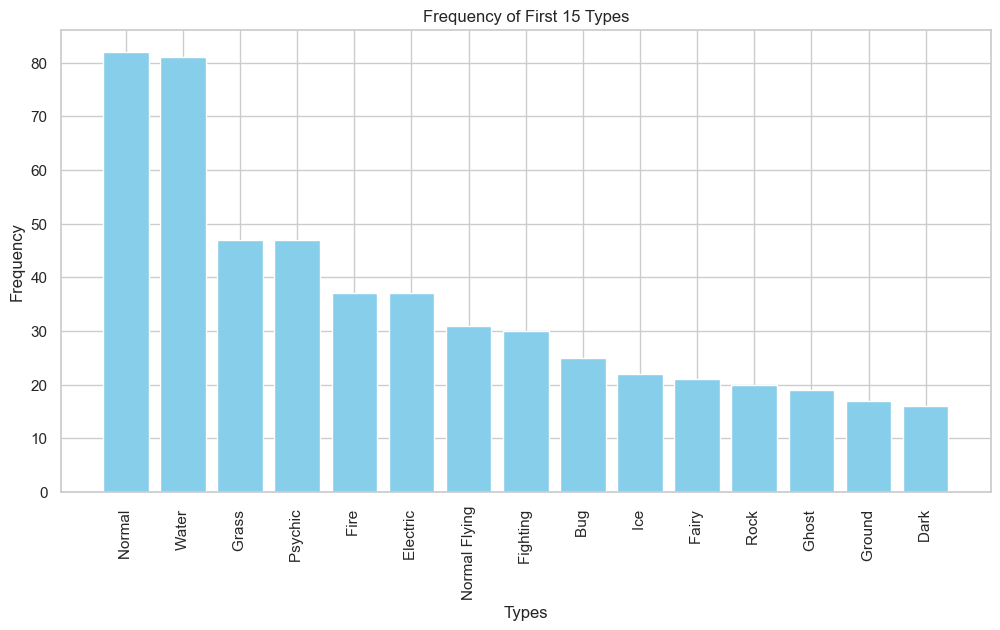

In [163]:
#Frequency of different Types
types_frequency = class_labels.value_counts()
plt.figure(figsize=(24, 12))
plt.bar(types_frequency.index, types_frequency.values, color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of Types')
plt.show()
#Plot of the first 15 frequent type
first_fifteen = types_frequency[:15]
plt.figure(figsize=(12, 6))
plt.bar(first_fifteen.index, first_fifteen.values, color='skyblue')
plt.xticks(rotation=90) 
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency of First 15 Types')
plt.show()

Displayed descriptive statistics for each feature, grouped by type

In [164]:
#Printing the data of types statistics
types_data =  data.groupby('Types')
pd.set_option('display.max_columns', None)
display(types_data.describe())
pd.reset_option('display.max_columns')

HP                                                          \
              count       mean        std   min    25%   50%     75%    max   
Types                                                                         
Bug            25.0  48.920000  13.372609  25.0  40.00  47.0   50.00   80.0   
Bug Dark        1.0  71.000000        NaN  71.0  71.00  71.0   71.00   71.0   
Bug Electric    4.0  63.500000  12.233833  50.0  55.25  63.5   71.75   77.0   
Bug Fairy       2.0  50.000000  14.142136  40.0  45.00  50.0   55.00   60.0   
Bug Fighting    5.0  84.600000  13.501852  71.0  80.00  80.0   85.00  107.0   
...             ...        ...        ...   ...    ...   ...     ...    ...   
Water Ice       4.0  90.000000  32.659863  50.0  80.00  90.0  100.00  130.0   
Water Poison    3.0  61.666667  20.207259  40.0  52.50  65.0   72.50   80.0   
Water Psychic   7.0  84.714286  14.511080  60.0  79.00  90.0   95.00   95.0   
Water Rock      5.0  76.600000  18.568791  54.0  65.00  74.0   90.00  100.0   
Water Steel     1.0  84.000000        NaN  84.0  84.00  84.0   84.00   84.0   

              Attack                                                       \
               count        mean        std    min     25%    50%     75%   
Types                                                                       
Bug             25.0   48.480000  25.326403   20.0   29.00   41.0   65.00   
Bug Dark         1.0  102.000000        NaN  102.0  102.00  102.0  102.00   
Bug Electric     4.0   69.000000  15.470402   47.0   64.25   73.5   78.25   
Bug Fairy        2.0   50.000000   7.071068   45.0   47.50   50.0   52.50   
Bug Fighting     5.0  144.200000  23.435017  125.0  135.00  137.0  139.00   
...              ...         ...        ...    ...     ...    ...     ...   
Water Ice        4.0   85.000000  10.801234   70.0   81.25   87.5   91.25   
Water Poison     3.0   68.333333  27.537853   40.0   55.00   70.0   82.50   
Water Psychic    7.0   81.714286  15.348336   65.0   75.00   75.0   88.50   
Water Rock       5.0   89.200000  24.056184   55.0   78.00   90.0  108.00   
Water Steel      1.0   86.000000        NaN   86.0   86.00   86.0   86.00   

                     Defense                                            \
                 max   count        mean        std   min   25%    50%   
Types                                                                    
Bug            125.0    25.0   54.960000  20.290556  20.0  41.0   45.0   
Bug Dark       102.0     1.0   78.000000        NaN  78.0  78.0   78.0   
Bug Electric    82.0     4.0   73.750000  22.126530  50.0  57.5   75.0   
Bug Fairy       55.0     2.0   50.000000  14.142136  40.0  45.0   50.0   
Bug Fighting   185.0     5.0   89.000000  39.293765  37.0  75.0   79.0   
...              ...     ...         ...        ...   ...   ...    ...   
Water Ice       95.0     4.0  110.000000  47.609523  80.0  80.0   90.0   
Water Poison    95.0     3.0   61.666667  25.166115  35.0  50.0   65.0   
Water Psychic  105.0     7.0   94.714286  40.380335  65.0  71.5   80.0   
Water Rock     115.0     5.0  110.200000  20.017492  90.0  95.0  103.0   
Water Steel     86.0     1.0   88.000000        NaN  88.0  88.0   88.0   

                             SP. Atk.                                       \
                  75%    max    count        mean        std    min    25%   
Types                                                                        
Bug             60.00  100.0     25.0   37.560000  18.954067   20.0   25.0   
Bug Dark        78.00   78.0      1.0   52.000000        NaN   52.0   52.0   
Bug Electric    91.25   95.0      4.0   88.500000  42.343831   55.0   56.5   
Bug Fairy       55.00   60.0      2.0   75.000000  28.284271   55.0   65.0   
Bug Fighting   115.00  139.0      5.0   71.000000  41.224992   40.0   40.0   
...               ...    ...      ...         ...        ...    ...    ...   
Water Ice      120.00  180.0      4.0   80.000000   7.071068   70.0   77.5   
Water Poison  

In [165]:

#Printing the mean according to stat in relevance to the types
columns_of_interest = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Height', 'Weight']

for column in columns_of_interest:
    col_by_type = types_data[column]
    type_mean = col_by_type.mean()
    type_mean = type_mean.sort_values(ascending=False)
    print(f"Mean value of {column}: {type_mean}")



Mean value of HP: Types
Dark Ground          155.000000
Fighting Electric    154.000000
Ghost Dragon         150.000000
Ground Normal        121.500000
Psychic Steel        117.000000
                        ...    
Bug Water             46.666667
Bug Ground            45.500000
Normal Ghost          45.000000
Poison Bug            40.000000
Bug Ghost              1.000000
Name: HP, Length: 221, dtype: float64
Mean value of Attack: Types
Ground Fire        180.000000
Psychic Dragon     167.000000
Psychic Ice        165.000000
Ice Fire           160.000000
Psychic Dark       160.000000
                      ...    
Electric Normal     46.500000
Ice Bug             45.000000
Normal Fairy        45.000000
Bug Psychic         43.333333
Ghost Fire          41.666667
Name: Attack, Length: 221, dtype: float64
Mean value of Defense: Types
Steel Ground       215.000000
Ice Rock           184.000000
Rock Steel         160.500000
Ground Fire        160.000000
Poison Ghost       160.000000
       

From te correlation matrix, we can see that height and weight have the strongest correlation of 0.65 while defense and speed have the lowest correlation of 0.01

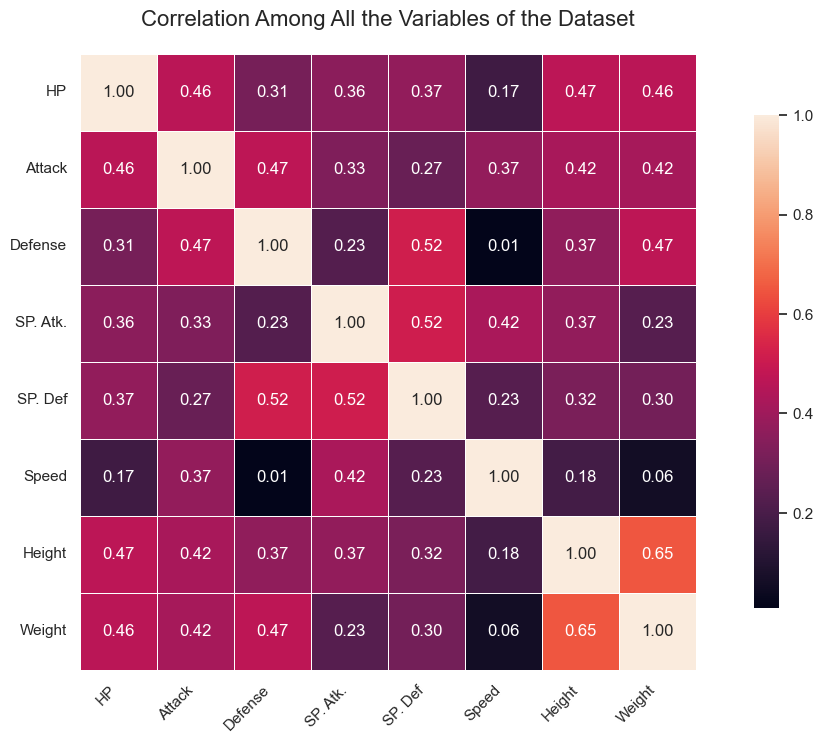

In [166]:
# Correlation Matrix between numerical columns
cor = features.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    cor, 
    annot=True,         
    fmt=".2f",         
    xticklabels=cor.columns, 
    yticklabels=cor.columns,
    square=True,      
    linewidths=0.5,   
    cbar_kws={"shrink": 0.8}  
)
plt.title("Correlation Among All the Variables of the Dataset", fontsize=16, pad=20)  
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

We plotted the height and weight. There seems to be many outliers, but there is a general positive correlation between the height and weight. Most pokemon are in the range of (0, 200) in weight and (0, 2.5) in height

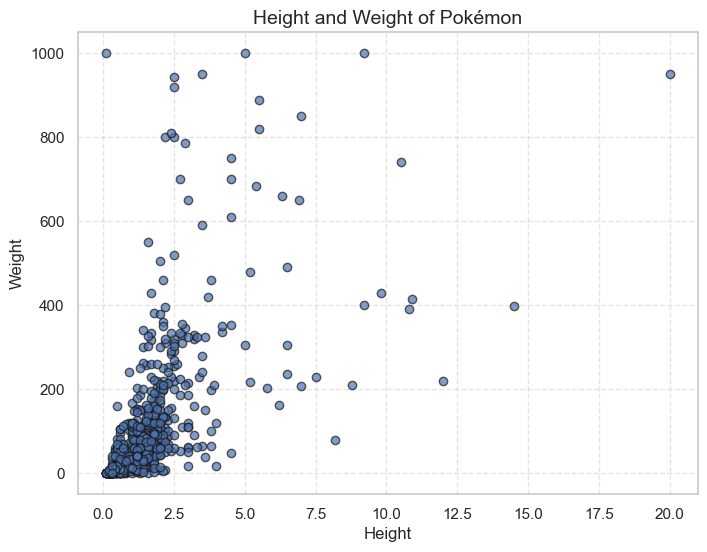

In [167]:
# Seeing if there is a correlation between height and weight
plt.figure(figsize=(8, 6))  
plt.scatter(data['Height'], data['Weight'], alpha=0.7, edgecolor='k')
plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title("Height and Weight of Pokémon", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

We thought that there would be a negatie correlation between speed and weight with heavier pokemon moving slower, but from the data, the heavier pokemon can have the same speed as the lighter pokemon

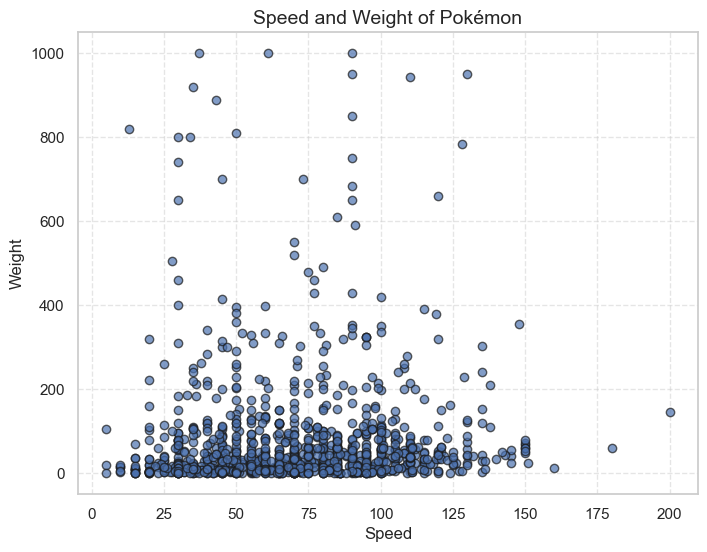

In [168]:
# Correlation between speed and weight
plt.figure(figsize=(8, 6))  
plt.scatter(data['Speed'], data['Weight'], alpha=0.7, edgecolor='k') 
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title("Speed and Weight of Pokémon", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

We plotted the speed and defense scatter plot, which had the lowest correlation in the correlation matrix. The points on the plot seems almost globular, but we can see a slight negative trend with the outer points

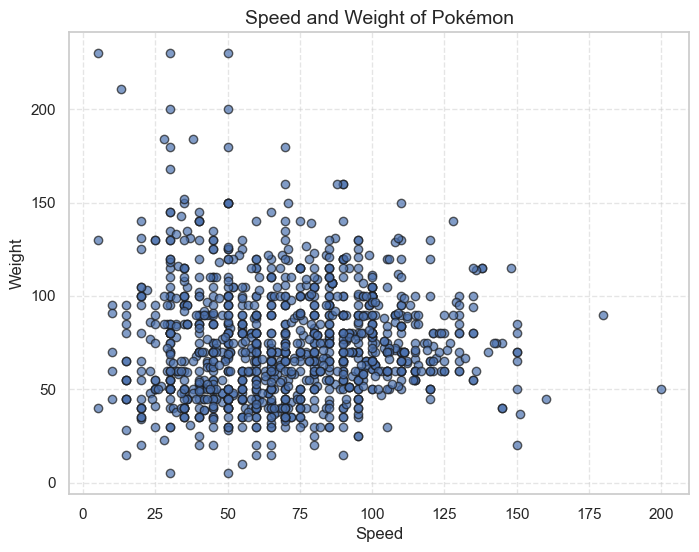

In [169]:
# Correlation between speed and weight
plt.figure(figsize=(8, 6))  
plt.scatter(data['Speed'], data['Defense'], alpha=0.7, edgecolor='k') 
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title("Speed and Weight of Pokémon", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

# Part 2: Modeling
Trying to predict what type a pokemon would be depending on their statistics.
### Classifers:
- K nearest neighbors
- Decision Trees
- Random Forest
- Naive Bayes
- AdaBoost
- Neural Networks
- Stacking


In [182]:
# One Hot
one_hot_labels = pd.get_dummies(class_labels)
display(one_hot_labels)

# One Hot Encoding First
one_hot_first = pd.get_dummies(first_type_label)
display(one_hot_first)

# create sample weights for the class
sample_weights = []

for index, row in data.iterrows():
    types = row['Types']
    
    # Get the weight for this type combination from weight_dict
    weight = weight_dict.get(types, (1, 0))  # Default to (1, 0) if not found
    sample_weights.append(weight[0])  # Using the weight for the primary type


sample_weights = np.array(sample_weights)

,Bug,Bug Dark,Bug Electric,Bug Fairy,Bug Fighting,Bug Fire,Bug Flying,Bug Ghost,Bug Grass,Bug Ground,...,Water Fighting,Water Flying,Water Ghost,Water Grass,Water Ground,Water Ice,Water Poison,Water Psychic,Water Rock,Water Steel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1211,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1212,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### K nearest Neighbors

In [183]:
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

param_grid = {
    'knn__n_neighbors': list(range(1, 25))
}

# Finding the best number of nearest neighbors
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, one_hot_first) # Primary "type"
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

# Cross validating CV = 5 because 10 is taking long
#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=5)    
nested_score = cross_val_score(grid_search, features, one_hot_first, cv=5) # Primary "Type"
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'knn__n_neighbors': 1}
Grid Search Accuracy: 14.825698058021292
Cross Validation Accuracy: 14.825698058021292


### Decision Trees

In [184]:
clf = DecisionTreeClassifier()

# No real reason for these numebers
params = {"max_depth": [5,19,15,20], 
          "min_samples_leaf": [5,19,15,20],
          "max_features": ['sqrt', 'log2'] }

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                      
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 15}
Grid Search Accuracy: 16.63809815324967
Cross Validation Accuracy: 14.90109741227476


### Random Forest

In [188]:
randomtree = RandomForestClassifier()

param_grid = {
    'max_depth': list(range(1, 10)),
    'min_samples_leaf': [5, 8, 10],
    'max_features': ['sqrt', 'log2']
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(randomtree, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=5) # Primary "Type"                                        
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8}
Grid Search Accuracy: 22.817059483726148
Cross Validation Accuracy: 20.839370132299422


Random Forest using sample weights: 

In [189]:
grid_search = GridSearchCV(randomtree, param_grid, cv=5, scoring='accuracy')
# fit using the sample weights
grid_search.fit(features, first_type_label, sample_weight=sample_weights)
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                          
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8}
Grid Search Accuracy: 22.156582661633166
Cross Validation Accuracy: 21.980761414442487


### Naive Bayes

In [190]:
clf = GaussianNB()
scores = cross_val_score(clf, features, first_type_label, cv=10)
print("Accuracy:", scores.mean()*100)
predictions = cross_val_predict(clf, features, first_type_label, cv=10)
matrix = confusion_matrix(first_type_label, predictions)
print(classification_report(first_type_label, predictions, zero_division=0))

Accuracy: 15.89418777943368
              precision    recall  f1-score   support

         Bug       0.13      0.51      0.20        91
        Dark       0.00      0.00      0.00        56
      Dragon       0.18      0.22      0.20        49
    Electric       0.19      0.27      0.22        74
       Fairy       0.09      0.03      0.05        31
    Fighting       0.18      0.26      0.21        50
        Fire       0.17      0.17      0.17        76
      Flying       0.00      0.00      0.00        10
       Ghost       0.00      0.00      0.00        47
       Grass       0.15      0.19      0.17       113
      Ground       0.20      0.09      0.12        47
         Ice       0.00      0.00      0.00        43
      Normal       0.22      0.28      0.24       134
      Poison       0.00      0.00      0.00        48
     Psychic       0.16      0.09      0.11        82
        Rock       0.14      0.07      0.10        68
       Steel       0.26      0.20      0.23        45

### AdaBoost

In [191]:
adaboost = AdaBoostClassifier(algorithm='SAMME') 
param_grid = {
    'n_estimators': [50, 70, 90, 120, 180, 200]
}

# Do not have to scale are data because using decision trees
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, one_hot_labels) Includes both "Types"
# Used the categorical labels since AdaBoost only accepts 1D Array
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                          
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'n_estimators': 180}
Grid Search Accuracy: 18.285549093629903
Cross Validation Accuracy: 16.22137921690828


AdaBoost using sample weights: 

In [192]:
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
# fit using the sample weights
grid_search.fit(features, first_type_label, sample_weight=sample_weights)
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)

#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"                                          
print("Cross Validation Accuracy:", nested_score.mean()*100)

{'n_estimators': 200}
Grid Search Accuracy: 17.04894058429412
Cross Validation Accuracy: 16.22137921690828


### Neural Nets

In [193]:
scaler = StandardScaler()
mlp = MLPClassifier(early_stopping=True)
pipe = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp)
])
param_grid = {
    'mlp__hidden_layer_sizes': list(range(30, 61, 10)),
    'mlp__activation': ['logistic', 'tanh', 'relu']
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(features, class_labels) Includes both "Types"
# Used the categorical labels
grid_search.fit(features, first_type_label) # Primary "type"
print(grid_search.best_params_)
print("Grid Search Accuracy:", grid_search.best_score_*100)
#nested_score = cross_val_score(grid_search, features, one_hot_labels, cv=10)    
nested_score = cross_val_score(grid_search, features, first_type_label, cv=10) # Primary "Type"  
print("Cross Validation Accuracy:", scores.mean()*100)

{'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': 40}
Grid Search Accuracy: 19.437132265415094
Cross Validation Accuracy: 15.89418777943368


### Stacking

In [195]:
estimators = [
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))),
    ('dtc', DecisionTreeClassifier(max_depth=19, max_features='log2', min_samples_leaf=5)),
    ('rtf', RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=5)),
    ('nb', GaussianNB()),
    ('adb', AdaBoostClassifier(n_estimators=50,algorithm='SAMME')),
    ('nn', make_pipeline(StandardScaler(), MLPClassifier(activation='relu', hidden_layer_sizes=40, early_stopping=True))) # stopping early means that maximum iterations (200) was reached w/out convergencing 
]
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
nested_score = cross_val_score(clf, features, first_type_label, cv=5) # Primary "Type"                                        
print("Accuracy:", nested_score.mean()*100)


Accuracy: 18.450838349828246


So after running our models with only a focus on Primary (Type 1) typing, we see low accuracies that can be attrituted to either stats being uniform across a lot of the primary types seen in the data exploration section. A reason that we see uniform stats across the types is due to the disregard of the Secondary typing of pokemon. Once we explore more of the affects of Secondary typing on a pokemon's stats we can potentially lead to higher accuracy scores and achieve better results. Initially we did two types but now we tried one type and we got a 21% accuracy; can we see our results so that we can try


## Adding learnable moves to our pokemon database

This column was extracted again from the PokeAPI the scripts for that are below. We see that with stats it is difficult to classifty the type. So let's go back to feature engineering and explore different features such as learnables moves to correctly identify the type a pokemon is.


```python

import requests
import pandas as pd
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed

# Configure logging
logging.basicConfig(
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s: %(message)s'
)
logger = logging.getLogger(__name__)

class PokemonMovesMapper:
    def __init__(self, 
                 pokemon_url='https://pokeapi.co/api/v2/pokemon',
                 max_workers=20):
        self.pokemon_url = pokemon_url
        self.max_workers = max_workers

    def fetch_pokemon_page(self, limit=1000, offset=0):
        """Fetch a single page of Pokemon data."""
        try:
            params = {'limit': limit, 'offset': offset}
            response = requests.get(self.pokemon_url, params=params, timeout=10)
            response.raise_for_status()
            return response.json()
        except requests.RequestException as e:
            logger.error(f"Error fetching Pokemon page (limit={limit}, offset={offset}): {e}")
            return None

    def fetch_pokemon_moves(self, pokemon_url):
        """Fetch moves for a specific Pokemon."""
        try:
            response = requests.get(pokemon_url, timeout=10)
            response.raise_for_status()
            details = response.json()
            
            # Extract moves
            moves = [move['move']['name'] for move in details['moves']]
            
            return {
                'pokemon_name': details['name'],
                'moves': ', '.join(sorted(set(moves)))  # Unique, sorted moves
            }
        except requests.RequestException as e:
            logger.error(f"Error fetching moves for Pokemon at {pokemon_url}: {e}")
            return None

    def get_pokemon_moves_mapping(self):
        """Retrieve moves for all Pokemon with parallel processing."""
        # First, get the total number of Pokemon
        first_page = self.fetch_pokemon_page(limit=1)
        if not first_page:
            logger.error("Failed to retrieve Pokemon data")
            return []

        total_pokemon = first_page['count']
        logger.info(f"Total Pokemon to retrieve moves for: {total_pokemon}")

        # Fetch all Pokemon URLs
        all_pokemon_resources = []
        offset = 0
        while offset < total_pokemon:
            page = self.fetch_pokemon_page(limit=1000, offset=offset)
            if not page:
                break
            all_pokemon_resources.extend(page['results'])
            offset += 1000

        # Parallel processing of Pokemon moves
        pokemon_moves = []
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            # Create futures for move fetching
            future_to_pokemon = {
                executor.submit(self.fetch_pokemon_moves, pokemon['url']): pokemon 
                for pokemon in all_pokemon_resources
            }

            # Collect results
            for future in as_completed(future_to_pokemon):
                pokemon_moves_data = future.result()
                if pokemon_moves_data:
                    pokemon_moves.append(pokemon_moves_data)
                    
                # Log progress
                if len(pokemon_moves) % 50 == 0:
                    logger.info(f"Retrieved moves for {len(pokemon_moves)} Pokemon")

        return pokemon_moves

    def save_to_csv(self, pokemon_moves, filename='pokemon_moves_mapping.csv'):
        """Save Pokemon moves mapping to a CSV file."""
        # Create DataFrame
        df = pd.DataFrame(pokemon_moves)
        
        # Save to CSV
        df.to_csv(filename, index=False)
        logger.info(f"Saved moves for {len(pokemon_moves)} Pokemon to {filename}")

def main():
    mapper = PokemonMovesMapper()
    
    # Retrieve Pokemon moves mapping
    pokemon_moves = mapper.get_pokemon_moves_mapping()
    
    # Save to CSV
    mapper.save_to_csv(pokemon_moves)



```python
import pandas as pd
from fuzzywuzzy import process

# PokeAPI-generated moves CSV
moves_df = pd.read_csv('pokemon_moves_mapping_from_api2.csv')

def pre_process_moves_df(df):
    df = df[~moves_df['pokemon_name'].str.contains('gmax', case=False)]
    return df
def convert_mega_name(name):
    # Check if the name contains the word 'mega' with spaces around it
    if ' mega ' in name.lower():
        # Split the name and join with a hyphen
        parts = name.lower().split(' mega ')
        return f"{parts[0]}-mega {parts[1]}".strip()
    return name    

your_pokemon_df = pd.read_csv('pokedex.csv')  # Replace with your actual filename
your_pokemon_df['Name'] = your_pokemon_df['Name'].apply(convert_mega_name)


# Function to find the best match for a Pokemon name
def find_best_match(name, name_list, threshold=80):
    """
    Find the best matching Pokemon name using fuzzy matching.
    
    :param name: Name to match
    :param name_list: List of names to match against
    :param threshold: Minimum score to consider a match valid
    :return: Best match or None if no good match found
    """
    match = process.extractOne(name, name_list)
    return match[0] if match[1] >= threshold else None

# Match Pokemon names and get their moves
matched_pokemon = []
moves_df = pre_process_moves_df(moves_df)
for _, row in your_pokemon_df.iterrows():
    # Assuming there's a column named 'name' in your CSV
    pokemon_name = row['Name']
    
    # Find the best match in the moves CSV
    best_match = find_best_match(pokemon_name, moves_df['pokemon_name'])
    
    if best_match:
        # Get moves for the matched Pokemon
        moves = moves_df[moves_df['pokemon_name'] == best_match]['moves'].values[0]
        
        # Create a new row with original data and matched moves
        matched_row = row.copy()
        matched_row['matched_name'] = best_match
        matched_row['moves'] = moves
        matched_pokemon.append(matched_row)
    else:
        print(f"No good match found for: {pokemon_name}")

# Convert to DataFrame
result_df = pd.DataFrame(matched_pokemon)

# Save the result
result_df.to_csv('matched_pokemon_moves.csv', index=False)

print(f"Matched {len(result_df)} Pokemon with their moves")

In [196]:
# pokemon_moves_df = pd.read_csv(r"C:\Users\kevin barcenas\Documents\GitHub\Pokemon_ML\matched_pokemon_moves.csv")
pokemon_moves_df = pd.read_csv(r"matched_pokemon_moves.csv")

pokemon_move_names = [
        "Zippy Zap", "Zing Zap", "Zen Headbutt", "Zap Cannon", "Yawn", "X-Scissor",
        "Wring Out", "Wrap", "Worry Seed", "Work Up", "Wood Hammer", "Wonder Room",
        "Withdraw", "Wish", "Wing Attack", "Will-O-Wisp", "Wildbolt Storm",
        "Wild Charge", "Wide Guard", "Wicked Torque", "Wicked Blow", "Whirlwind",
        "Whirlpool", "Weather Ball", "Wave Crash", "Waterfall", "Water Spout",
        "Water Sport", "Water Shuriken", "Water Pulse", "Water Pledge", "Water Gun",
        "Wake-Up Slap", "Volt Tackle", "Volt Switch", "Vital Throw", "Vise Grip",
        "Vine Whip", "Victory Dance", "Venoshock", "Venom Drench", "Veevee Volley",
        "Vacuum Wave", "V-create", "Uproar", "Upper Hand", "U-turn", "Twister",
        "Twinkle Tackle", "Twineedle", "Twin Beam", "Trump Card", "Trop Kick",
        "Triple Kick", "Triple Dive", "Triple Axel", "Triple Arrows", "Trick-or-Treat",
        "Trick Room", "Trick", "Tri Attack", "Transform", "Trailblaze", "Toxic Thread",
        "Toxic Spikes", "Toxic", "Torment", "Torch Song", "Topsy-Turvy", "Tidy Up",
        "Tickle", "Thunderous Kick", "Thunderclap", "Thunderbolt", "Thunder Wave",
        "Thunder Shock", "Thunder Punch", "Thunder Fang", "Thunder Cage", "Thunder",
        "Throat Chop", "Thrash", "Thousand Waves", "Thousand Arrows", "Thief",
        "Terrain Pulse", "Tera Starstorm", "Tera Blast", "Temper Flare", "Teleport",
        "Telekinesis", "Teeter Dance", "Tectonic Rage", "Techno Blast", "Teatime",
        "Tearful Look", "Taunt", "Tar Shot", "Take Heart", "Take Down", "Tailwind",
        "Tail Whip", "Tail Slap", "Tail Glow", "Tackle", "Tachyon Cutter", "Syrup Bomb",
        "Synthesis", "Synchronoise", "Swords Dance", "Switcheroo", "Swift",
        "Sweet Scent", "Sweet Kiss", "Swallow", "Swagger", "Surging Strikes", "Surf",
        "Supersonic Skystrike", "Supersonic", "Superpower", "Supercell Slam",
        "Super Fang", "Sunsteel Strike", "Sunny Day", "Sucker Punch", "Subzero Slammer",
        "Substitute", "Submission", "Stun Spore", "Stuff Cheeks", "Struggle Bug",
        "Struggle", "String Shot", "Strength Sap", "Strength", "Strange Steam",
        "Storm Throw", "Stored Power", "Stone Edge", "Stone Axe", "Stomping Tantrum",
        "Stomp", "Stoked Sparksurfer", "Stockpile", "Sticky Web", "Steel Wing",
        "Steel Roller", "Steel Beam", "Steamroller", "Steam Eruption", "Stealth Rock",
        "Springtide Storm", "Spotlight", "Spore", "Splishy Splash",
        "Splintered Stormshards", "Splash", "Spite", "Spit Up", "Spirit Shackle",
        "Spirit Break", "Spin Out", "Spiky Shield", "Spikes", "Spike Cannon",
        "Spider Web", "Spicy Extract", "Speed Swap", "Spectral Thief", "Sparkly Swirl",
        "Sparkling Aria", "Spark", "Spacial Rend", "Soul-Stealing 7-Star Strike",
        "Sonic Boom", "Solar Blade", "Solar Beam", "Soft-Boiled", "Soak", "Snowscape",
        "Snore", "Snipe Shot", "Snatch", "Snarl", "Snap Trap", "Smokescreen", "Smog",
        "Smelling Salts", "Smart Strike", "Smack Down", "Sludge Wave", "Sludge Bomb",
        "Sludge", "Sleep Talk", "Sleep Powder", "Slash", "Slam", "Slack Off",
        "Sky Uppercut", "Sky Drop", "Sky Attack", "Skull Bash", "Skitter Smack",
        "Skill Swap", "Sketch", "Sizzly Slide", "Sinister Arrow Raid", "Sing",
        "Simple Beam", "Silver Wind", "Silk Trap", "Signal Beam", "Shore Up",
        "Shock Wave", "Shift Gear", "Shelter", "Shell Trap", "Shell Smash",
        "Shell Side Arm", "Sheer Cold", "Shed Tail", "Shattered Psyche", "Sharpen",
        "Shadow Sneak", "Shadow Punch", "Shadow Force", "Shadow Claw", "Shadow Bone",
        "Shadow Ball", "Self-Destruct", "Seismic Toss", "Seed Flare", "Seed Bomb",
        "Secret Sword", "Secret Power", "Searing Sunraze Smash", "Searing Shot",
        "Screech", "Scratch", "Scorching Sands", "Scary Face", "Scale Shot", "Scald",
        "Savage Spin-Out", "Sappy Seed", "Sandstorm", "Sandsear Storm", "Sand Tomb",
        "Sand Attack", "Salt Cure", "Safeguard", "Sacred Sword", "Sacred Fire",
        "Ruination", "Round", "Rototiller", "Roost", "Rollout", "Rolling Kick",
        "Role Play", "Rock Wrecker", "Rock Tomb", "Rock Throw", "Rock Smash",
        "Rock Slide", "Rock Polish", "Rock Climb", "Rock Blast", "Roar of Time",
        "Roar", "Rising Voltage", "Revival Blessing", "Reversal", "Revenge",
        "Revelation Dance", "Return", "Retaliate", "Rest", "Relic Song", "Refresh",
        "Reflect Type", "Reflect", "Recycle", "Recover", "Razor Wind", "Razor Shell",
        "Razor Leaf", "Rapid Spin", "Rain Dance", "Raging Fury", "Raging Bull",
        "Rage Powder", "Rage Fist", "Rage", "Quiver Dance", "Quick Guard",
        "Quick Attack", "Quash", "Pyro Ball", "Pursuit", "Purify", "Punishment",
        "Pulverizing Pancake", "Psywave", "Psystrike", "Psyshock", "Psyshield Bash",
        "Psycho Shift", "Psycho Cut", "Psycho Boost", "Psychic Terrain", "Psychic Noise",
        "Psychic Fangs", "Psychic", "Psych Up", "Psyblade", "Psybeam", "Protect",
        "Prismatic Laser", "Present", "Precipice Blades", "Power-Up Punch",
        "Power Whip", "Power Trip", "Power Trick", "Power Swap", "Power Split",
        "Power Shift", "Power Gem", "Powder Snow", "Powder", "Pound", "Pounce",
        "Population Bomb", "Poltergeist", "Pollen Puff", "Poison Tail", "Poison Sting",
        "Poison Powder", "Poison Jab", "Poison Gas", "Poison Fang", "Pluck", "Play Rough",
        "Play Nice", "Plasma Fists", "Pin Missile", "Pika Papow", "Photon Geyser",
        "Phantom Force", "Petal Dance", "Petal Blizzard", "Perish Song", "Peck",
        "Payback", "Pay Day", "Parting Shot", "Parabolic Charge", "Pain Split",
        "Overheat", "Overdrive", "Outrage", "Origin Pulse", "Order Up", "Ominous Wind",
        "Odor Sleuth", "Octolock", "Octazooka", "Oceanic Operetta", "Obstruct",
        "Oblivion Wing", "Nuzzle", "Noxious Torque", "Noble Roar", "No Retreat",
        "Nightmare", "Night Slash", "Night Shade", "Night Daze", "Never-Ending Nightmare",
        "Needle Arm", "Nature's Madness", "Nature Power", "Natural Gift", "Nasty Plot",
        "Mystical Power", "Mystical Fire", "Multi-Attack", "Muddy Water", "Mud-Slap",
        "Mud Sport", "Mud Shot", "Mud Bomb", "Mountain Gale", "Mortal Spin",
        "Morning Sun", "Moonlight", "Moongeist Beam", "Moonblast", "Misty Terrain",
        "Misty Explosion", "Mist Ball", "Mist", "Mirror Shot", "Mirror Move",
        "Mirror Coat", "Miracle Eye", "Minimize", "Mind Reader", "Mind Blown",
        "Mimic", "Milk Drink", "Mighty Cleave", "Metronome", "Meteor Mash",
        "Meteor Beam", "Meteor Assault", "Metal Sound", "Metal Claw", "Metal Burst",
        "Menacing Moonraze Maelstrom", "Memento", "Megahorn", "Mega Punch", "Mega Kick",
        "Mega Drain", "Meditate", "Mean Look", "Me First", "Max Wyrmwind", "Max Strike",
        "Max Steelspike", "Max Starfall", "Max Rockfall", "Max Quake", "Max Phantasm",
        "Max Overgrowth", "Max Ooze", "Max Mindstorm", "Max Lightning", "Max Knuckle",
        "Max Hailstorm", "Max Guard", "Max Geyser", "Max Flutterby", "Max Flare",
        "Max Darkness", "Max Airstream", "Matcha Gotcha", "Mat Block", "Malignant Chain",
        "Malicious Moonsault", "Make It Rain", "Magnitude", "Magnetic Flux",
        "Magnet Rise", "Magnet Bomb", "Magma Storm", "Magical Torque", "Magical Leaf",
        "Magic Room", "Magic Powder", "Magic Coat", "Mach Punch", "Luster Purge",
        "Lunge", "Lunar Dance", "Lunar Blessing", "Lumina Crash", "Lucky Chant",
        "Low Sweep", "Low Kick", "Lovely Kiss", "Lock-On", "Liquidation",
        "Light That Burns the Sky", "Light Screen", "Light of Ruin", "Life Dew",
        "Lick", "Let's Snuggle Forever", "Leer", "Leech Seed", "Leech Life", "Leafage",
        "Leaf Tornado", "Leaf Storm", "Leaf Blade", "Lava Plume", "Last Respects",
        "Last Resort", "Lash Out", "Laser Focus", "Land's Wrath", "Kowtow Cleave",
        "Knock Off", "King's Shield", "Kinesis", "Karate Chop", "Jungle Healing",
        "Jump Kick", "Judgment", "Jet Punch", "Jaw Lock", "Ivy Cudgel", "Iron Tail",
        "Iron Head", "Iron Defense", "Ion Deluge", "Instruct", "Ingrain", "Infestation",
        "Inferno Overdrive", "Inferno", "Infernal Parade", "Incinerate", "Imprison",
        "Icy Wind", "Icicle Spear", "Icicle Crash", "Ice Spinner", "Ice Shard",
        "Ice Punch", "Ice Hammer", "Ice Fang", "Ice Burn", "Ice Beam", "Ice Ball",
        "Hypnosis", "Hyperspace Hole", "Hyperspace Fury", "Hyper Voice", "Hyper Fang",
        "Hyper Drill", "Hyper Beam", "Hydro Vortex", "Hydro Steam", "Hydro Pump",
        "Hydro Cannon", "Hurricane", "Howl", "Horn Leech", "Horn Drill", "Horn Attack",
        "Hone Claws", "Hold Hands", "Hold Back", "High Jump Kick", "High Horsepower",
        "Hidden Power", "Hex", "Helping Hand", "Heavy Slam", "Heat Wave", "Heat Crash",
        "Heart Swap", "Heart Stamp", "Healing Wish", "Heal Pulse", "Heal Order",
        "Heal Block", "Heal Bell", "Headlong Rush", "Headbutt", "Head Smash",
        "Head Charge", "Haze", "Harden", "Hard Press", "Happy Hour", "Hammer Arm",
        "Hail", "Gyro Ball", "Gust", "Gunk Shot", "Guillotine", "Guardian of Alola",
        "Guard Swap", "Guard Split", "Grudge", "Growth", "Growl", "Gravity", "Grav Apple",
        "Grassy Terrain", "Grassy Glide", "Grass Whistle", "Grass Pledge", "Grass Knot",
        "Glitzy Glow", "Glare", "Glaive Rush", "Glaciate", "Glacial Lance",
        "Gigavolt Havoc", "Gigaton Hammer", "Giga Impact", "Giga Drain", "Geomancy",
        "Genesis Supernova", "Gear Up", "Gear Grind", "Gastro Acid", "Future Sight",
        "Fusion Flare", "Fusion Bolt", "Fury Swipes", "Fury Cutter", "Fury Attack",
        "Frustration", "Frost Breath", "Frenzy Plant", "Freezy Frost", "Freezing Glare",
        "Freeze-Dry", "Freeze Shock", "Foul Play", "Forest's Curse", "Foresight",
        "Force Palm", "Follow Me", "Focus Punch", "Focus Energy", "Focus Blast",
        "Flying Press", "Fly", "Flower Trick", "Flower Shield", "Floral Healing",
        "Floaty Fall", "Flip Turn", "Fling", "Fleur Cannon", "Flatter", "Flash Cannon",
        "Flash", "Flare Blitz", "Flamethrower", "Flame Wheel", "Flame Charge",
        "Flame Burst", "Flail", "Fissure", "Fishious Rend", "First Impression",
        "Fire Spin", "Fire Punch", "Fire Pledge", "Fire Lash", "Fire Fang", "Fire Blast",
        "Final Gambit", "Fillet Away", "Fiery Wrath", "Fiery Dance", "Fickle Beam",
        "Fell Stinger", "Feint Attack", "Feint", "Feather Dance", "False Swipe",
        "False Surrender", "Fake Tears", "Fake Out", "Fairy Wind", "Fairy Lock",
        "Facade", "Extreme Speed", "Extreme Evoboost", "Extrasensory", "Explosion",
        "Expanding Force", "Eternabeam", "Esper Wing", "Eruption", "Entrainment",
        "Energy Ball", "Endure", "Endeavor", "Encore", "Ember", "Embargo", "Electroweb",
        "Electro Shot", "Electro Drift", "Electro Ball", "Electrify", "Electric Terrain",
        "Egg Bomb", "Eerie Spell", "Eerie Impulse", "Echoed Voice", "Earthquake",
        "Earth Power", "Dynamic Punch", "Dynamax Cannon", "Dual Wingbeat", "Dual Chop",
        "Drum Beating", "Drill Run", "Drill Peck", "Dream Eater", "Draining Kiss",
        "Drain Punch", "Dragon Tail", "Dragon Rush", "Dragon Rage", "Dragon Pulse",
        "Dragon Hammer", "Dragon Energy", "Dragon Darts", "Dragon Dance", "Dragon Claw",
        "Dragon Cheer", "Dragon Breath", "Dragon Ascent", "Draco Meteor", "Double-Edge",
        "Double Team", "Double Slap", "Double Shock", "Double Kick", "Double Iron Bash",
        "Double Hit", "Doom Desire", "Doodle", "Dizzy Punch", "Dive", "Discharge",
        "Disarming Voice", "Disable", "Dire Claw", "Dig", "Diamond Storm",
        "Devastating Drake", "Detect", "Destiny Bond", "Defog", "Defense Curl",
        "Defend Order", "Decorate", "Dazzling Gleam", "Darkest Lariat", "Dark Void",
        "Dark Pulse", "Cut", "Curse", "Crush Grip", "Crush Claw", "Crunch", "Cross Poison",
        "Cross Chop", "Crafty Shield", "Crabhammer", "Covet", "Court Change", "Counter",
        "Cotton Spore", "Cotton Guard", "Cosmic Power", "Corrosive Gas", "Corkscrew Crash",
        "Core Enforcer", "Copycat", "Conversion 2", "Conversion", "Continental Crush",
        "Constrict", "Confusion", "Confuse Ray", "Confide", "Comeuppance", "Comet Punch",
        "Combat Torque", "Collision Course", "Coil", "Coaching", "Close Combat",
        "Clear Smog", "Clangorous Soulblaze", "Clangorous Soul", "Clanging Scales",
        "Clamp", "Circle Throw", "Chloroblast", "Chip Away", "Chilly Reception",
        "Chilling Water", "Chatter", "Charm", "Charge Beam", "Charge", "Celebrate",
        "Ceaseless Edge", "Catastropika", "Captivate", "Camouflage", "Calm Mind",
        "Buzzy Buzz", "Burning Jealousy", "Burning Bulwark", "Burn Up", "Bullet Seed",
        "Bullet Punch", "Bulldoze", "Bulk Up", "Bug Buzz", "Bug Bite", "Bubble Beam",
        "Bubble", "Brutal Swing", "Brine", "Brick Break", "Breakneck Blitz",
        "Breaking Swipe", "Brave Bird", "Branch Poke", "Bouncy Bubble", "Bounce",
        "Boomburst", "Bonemerang", "Bone Rush", "Bone Club", "Bolt Strike", "Bolt Beak",
        "Body Slam", "Body Press", "Blue Flare", "Bloom Doom", "Blood Moon", "Block",
        "Blizzard", "Bleakwind Storm", "Blazing Torque", "Blaze Kick", "Blast Burn",
        "Black Hole Eclipse", "Bitter Malice", "Bitter Blade", "Bite", "Bind", "Bide",
        "Bestow", "Belly Drum", "Belch", "Behemoth Blade", "Behemoth Bash", "Beat Up","Beak Blast", "Baton Pass", "Barrier", "Barrage", "Barb Barrage", "Baneful Bunker",
        "Baddy Bad", "Baby-Doll Eyes", "Axe Kick", "Avalanche", "Autotomize", "Aurora Veil",
        "Aurora Beam", "Aura Wheel", "Aura Sphere", "Attract", "Attack Order", "Astral Barrage",
        "Astonish", "Assurance", "Assist", "Aromatic Mist", "Aromatherapy", "Armor Cannon",
        "Arm Thrust", "Aqua Tail", "Aqua Step", "Aqua Ring", "Aqua Jet", "Aqua Cutter",
        "Apple Acid", "Ancient Power", "Anchor Shot", "Amnesia", "Ally Switch", "Alluring Voice",
        "All-Out Pummeling", "Air Slash", "Air Cutter", "Agility", "After You", "Aeroblast",
        "Aerial Ace", "Acupressure", "Acrobatics", "Acid Spray", "Acid Downpour", "Acid Armor",
        "Acid", "Accelerock", "Absorb", "10,000,000 Volt Thunderbolt",
    ]

#removal of columns
pokemon_moves_df.drop("Name",axis=1, inplace=True)
pokemon_moves_df.drop("Image",axis=1, inplace=True)
pokemon_moves_df.drop("Index",axis=1, inplace=True)
pokemon_moves_df.drop("matched_name",axis=1, inplace=True)
pokemon_moves_df.drop("Total",axis=1, inplace=True)
pokemon_moves_df.drop("HP",axis=1, inplace=True)
pokemon_moves_df.drop("Attack",axis=1, inplace=True)
pokemon_moves_df.drop("Defense",axis=1, inplace=True)
pokemon_moves_df.drop("SP. Atk.",axis=1, inplace=True)
pokemon_moves_df.drop("SP. Def",axis=1, inplace=True)
pokemon_moves_df.drop("Speed",axis=1, inplace=True)


pokemon_moves_df['moves'] = pokemon_moves_df['moves'].str.split(',')

move_columns = {move: pokemon_moves_df['moves'].apply(lambda x: 1 if move in x else 0) for move in pokemon_move_names}

move_df = pd.DataFrame(move_columns)

pokemon_moves_df = pd.concat([pokemon_moves_df, move_df], axis=1)
    
pokemon_moves_df.drop("moves",axis=1, inplace=True)

    
display(pokemon_moves_df.head())


,Type 1,Type 2,Zippy Zap,Zing Zap,Zen Headbutt,Zap Cannon,Yawn,X-Scissor,Wring Out,Wrap,...,Aerial Ace,Acupressure,Acrobatics,Acid Spray,Acid Downpour,Acid Armor,Acid,Accelerock,Absorb,"10,000,000 Volt Thunderbolt"
0,Grass,Poison,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grass,Poison,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grass,Poison,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grass,Poison,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fire,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Approaches for Handling Dual Types
1. One-Hot Encoding for Both Types

In [197]:
all_types = list(type_1)
one_hot_df = pokemon_moves_df
for poke_type in all_types:
    one_hot_df[poke_type] = one_hot_df.apply(
        lambda row: int(row['Type 1'] == poke_type or row['Type 2'] == poke_type), axis=1
    )
    
cleaned_data = one_hot_df.drop(['Type 1', 'Type 2'], axis=1, inplace=False)    
moves_df = cleaned_data.loc[:, :'10,000,000 Volt Thunderbolt']  
labels_df = cleaned_data.loc[:, 'Dragon':] 
display(moves_df.head())
display(labels_df.head())


,Zippy Zap,Zing Zap,Zen Headbutt,Zap Cannon,Yawn,X-Scissor,Wring Out,Wrap,Worry Seed,Work Up,...,Aerial Ace,Acupressure,Acrobatics,Acid Spray,Acid Downpour,Acid Armor,Acid,Accelerock,Absorb,"10,000,000 Volt Thunderbolt"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Dragon,Steel,Flying,Rock,Fire,Electric,Dark,Ghost,Ground,Ice,Water,Grass,Fighting,Fairy,Poison,Normal,Bug
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Option 1: Logistic Regression (One-vs-Rest)

    Treat each type as an independent binary classification problem.


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(moves_df, labels_df, test_size=0.6, random_state=42)

# Train a One-vs-Rest Logistic Regression
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Make predictions
y_pred_1 = model.predict(X_test)

Option 2: Random Forest with Multi-Output Wrapper

    Random forests can handle non-linear relationships between moves and types.

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Train Random Forest with Multi-Output Wrapper
rf_model = MultiOutputClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_2 = rf_model.predict(X_test)

In [200]:
from sklearn.metrics import hamming_loss, f1_score, jaccard_score

# Evaluate the first model
print("Hamming Loss:", hamming_loss(y_test, y_pred_1))
print("Macro F1-Score:", f1_score(y_test, y_pred_1, average='macro'))
print("Micro F1-Score:", f1_score(y_test, y_pred_1, average='micro'))

# Evaluate the second model
print("Hamming Loss:", hamming_loss(y_test, y_pred_2))
print("Macro F1-Score:", f1_score(y_test, y_pred_2, average='macro'))
print("Micro F1-Score:", f1_score(y_test, y_pred_2, average='micro'))


Hamming Loss: 0.08440248527394496
Macro F1-Score: 0.0
Micro F1-Score: 0.0
Hamming Loss: 0.08440248527394496
Macro F1-Score: 0.0
Micro F1-Score: 0.0


In [201]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, hamming_loss, jaccard_score

# Train a multi-output neural network
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_nn = nn_model.predict(X_test)
print("Neural Network (Multi-Output)")
print("Hamming Loss:", hamming_loss(y_test, y_pred_nn))
print("Jaccard Index (Macro):", jaccard_score(y_test, y_pred_nn, average='macro'))
print("Jaccard Index (Micro):", jaccard_score(y_test, y_pred_nn, average='micro'))
print(classification_report(y_test, y_pred_nn))


Neural Network (Multi-Output)
Hamming Loss: 0.08440248527394496
Jaccard Index (Macro): 0.0
Jaccard Index (Micro): 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        58
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        51
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00       109
          11       0.00      0.00      0.00        84
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        59
          15     

c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\m

In [202]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Train an OvR classifier
ovr_model = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=500))
ovr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_ovr = ovr_model.predict(X_test)
print("One-vs-Rest (OvR)")
print("Hamming Loss:", hamming_loss(y_test, y_pred_ovr))
print("Jaccard Index (Macro):", jaccard_score(y_test, y_pred_ovr, average='macro'))
print("Jaccard Index (Micro):", jaccard_score(y_test, y_pred_ovr, average='micro'))
print(classification_report(y_test, y_pred_ovr))

One-vs-Rest (OvR)
Hamming Loss: 0.08440248527394496
Jaccard Index (Macro): 0.0
Jaccard Index (Micro): 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        58
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        51
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00       109
          11       0.00      0.00      0.00        84
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        59
          15       0.00      

c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\m

In [203]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest for multi-label classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest")
print("Hamming Loss:", hamming_loss(y_test, y_pred_rf))
print("Jaccard Index (Macro):", jaccard_score(y_test, y_pred_rf, average='macro'))
print("Jaccard Index (Micro):", jaccard_score(y_test, y_pred_rf, average='micro'))
print(classification_report(y_test, y_pred_rf))

Random Forest
Hamming Loss: 0.08440248527394496
Jaccard Index (Macro): 0.0
Jaccard Index (Micro): 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        58
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        51
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00       109
          11       0.00      0.00      0.00        84
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        59
          15       0.00      0.00

c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mayo\anaconda3\Lib\site-packages\sklearn\m

The low scores could be attributed to the large number of Pokémon moves (features) compared to the relatively smaller number of data samples. This creates a few potential challenges:
1. Curse of Dimensionality

    Problem: Having over 900 moves as features makes the feature space very large. If the dataset doesn’t have enough samples to cover this space adequately, it becomes harder for the model to learn meaningful patterns. This often leads to poor generalization on unseen data.
    Solution: Feature selection or dimensionality reduction techniques can help. Identify the most important moves (features) that strongly correlate with Pokémon types and use only those.

2. Sparse Feature Representation

    Problem: Since most Pokémon can only learn a small subset of all possible moves, the feature matrix is likely very sparse (mostly zeros). Sparse data can make learning more difficult for some models.
    Solution:
        Use models that handle sparsity well, such as tree-based models or regularized linear models.
        Alternatively, aggregate or cluster similar moves to reduce sparsity.

3. Multi-Label Complexity

    Problem: The multi-label nature of the problem adds complexity. Pokémon can belong to multiple types, making classification harder.
    Solution:
        Use specialized multi-label techniques like neural networks with sigmoid outputs or ensemble methods.
        Augment your data with synthetic samples if possible (e.g., using SMOTE for multi-label).

In [204]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each move with respect to Pokémon types
mutual_info = mutual_info_classif(moves_df, labels_df, discrete_features=True)

# Create a DataFrame to sort and select top moves
move_importance = pd.DataFrame({'Move': moves_df.columns, 'Importance': mutual_info})
move_importance = move_importance.sort_values(by='Importance', ascending=False)

# Display top 20 moves
top_moves = move_importance.head(20)['Move']
print(top_moves)

# Filter moves_df for these top moves
filtered_moves_df = moves_df[top_moves]

ValueError: y should be a 1d array, got an array of shape (1215, 17) instead.